# Regression Trees and Model Optimization - Lab

## Introduction

In this final lab, we'll see how to apply regression analysis using CART trees for regression while making use of some hyperparameter tuning to improve our model. For a comparison of predictive capabilities and computational cost, we'll work the "Boston Housing" dataset. This will allow us to compare different regression approaches in terms of their accuracy and cost involved.

## Objectives
You will be able to:
- Apply predictive regression analysis with CART trees
- Get the data ready for modeling
- Tune the key hyper parameters based a various models developed during training 
- Study the impact of tree pruning on the quality of predictions

## Boston Housing Dataset - Again ! 

The dataset is available in the repo as `boston.csv`. 

- Load the Dataset and print its head and dimensions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('boston.csv')
print(df.shape)
df.head()

(506, 15)


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Identify Features and Target Data
In this lab, we shall use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. You'll find a brief description of each predictor below:

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

#### Target
- `MEDV`',the median value of the home.


- Create dataframes for features and target as shown above. 
- Inspect the contents for validity 

In [2]:
X = df[['rm','lstat','ptratio']]
y = df.medv

## Inspect Correlations 

- Use scatter plots to show the correlation between chosen features and target variable
- Comment on each scatter plot 

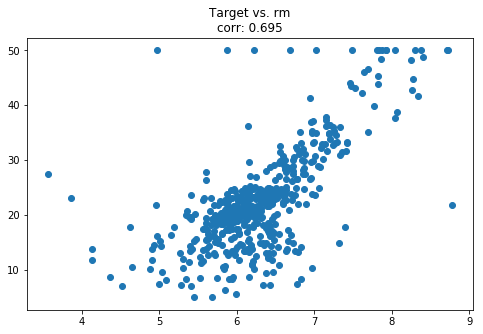

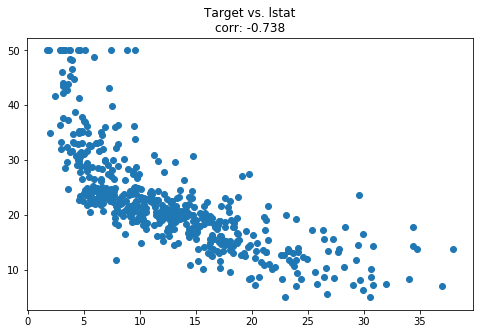

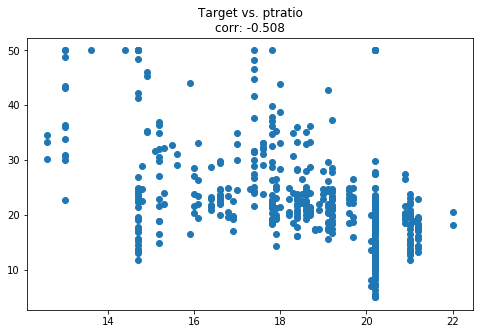

In [7]:
for col in X.columns:
    correlation = round(np.corrcoef(X[col],y)[0][1],3)
    plt.figure(figsize=(8,5))
    plt.scatter(X[col],y)
    plt.title(str("Target vs. "+col+"\ncorr: "+str(correlation)))
    plt.show();

## Create Evaluation Metrics

- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal sized arrays showing true and predicted values
- TEst the function with given data 

In [8]:
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    r2 = r2_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    return [r2, mse]
# Calculate the performance - TEST
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

[0.9228556485355649, 0.4719999999999998]

## Supervised Training 
- For supervised learning, split the `features` and `target` datasets into training/test data (80/20). 
- For reproducibility, use `random_state=42`

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Grow a Vanilla Regression Tree

- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above.
- Use `random_state=45` for tree instance
- Record your observations

In [10]:
regressor = DecisionTreeRegressor(random_state=45)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
performance(y_test, y_pred)
# R2 - pretty low. 47% of variance explained by model.

[0.47097115950374013, 38.795686274509805]

## Hyperparameter Tuning 

- Find the best tree depth for a depth range: 1-30
- Run the regressor repeatedly in a for loop for each depth value. 
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures, for all runs.
- Comment on the output 

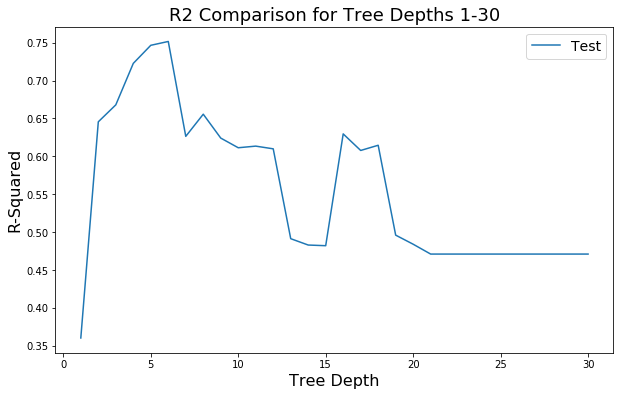

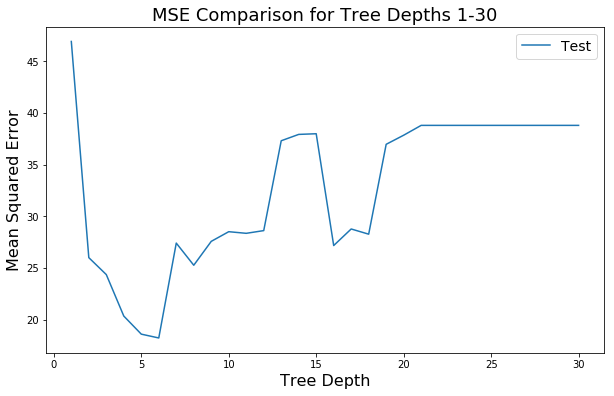

In [12]:
max_depths = np.linspace(1,30,30)
test_r2 = []
test_mse = []
for max_depth in max_depths:
    regressor = DecisionTreeRegressor(random_state=45, max_depth=max_depth)
    regressor.fit(X_train, y_train)
    y_hat_test = regressor.predict(X_test)
    r2, mse = performance(y_test, y_hat_test)
    test_r2.append(r2)
    test_mse.append(mse)

plt.figure(figsize=(10,6))
plt.plot(max_depths, test_r2, label='Test')
plt.title("R2 Comparison for Tree Depths 1-30", fontsize=18)
plt.xlabel('Tree Depth', fontsize=16)
plt.ylabel('R-Squared', fontsize=16)
plt.legend(fontsize=14);
plt.figure(figsize=(10,6))
plt.plot(max_depths, test_mse, label='Test')
plt.title("MSE Comparison for Tree Depths 1-30", fontsize=18)
plt.xlabel('Tree Depth', fontsize=16)
plt.ylabel('Mean Squared Error', fontsize=16)
plt.legend(fontsize=14);


## More Hyperparameter Tuning 

- Repeat the above process for `min_samples_split` parameter

- Use a a range of values from 2-10 for this parameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above

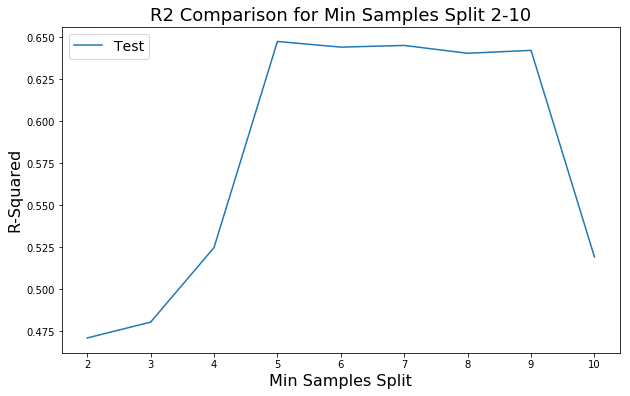

In [13]:
min_samples_splits = np.linspace(2,10,9)
test_r2 = []
test_mse = []
for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(random_state=45,min_samples_split=int(min_samples_split))
    regressor.fit(X_train, y_train)
    y_hat_test = regressor.predict(X_test)
    r2, mse = performance(y_test, y_hat_test)
    test_r2.append(r2)
    test_mse.append(mse)

plt.figure(figsize=(10,6))
plt.plot(min_samples_splits, test_r2, label='Test')
plt.title("R2 Comparison for Min Samples Split 2-10", fontsize=18)
plt.xlabel('Min Samples Split', fontsize=16)
plt.ylabel('R-Squared', fontsize=16)
plt.legend(fontsize=14);

# Run the "Optimized" Model 

- Use the best values for max_depth and min_samples_split found in previous runs and run an optimized model with these values. 
- Calculate the performance and comment on the output 

In [14]:
regressor = DecisionTreeRegressor(random_state=45, max_depth=6, min_samples_split=6)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
performance(y_test, y_pred)

[0.7510017608643338, 18.259982876077185]

## Level Up - Optional 

- How about bringing in some more features from the original dataset which may be good predictors?
- Also , try tuning more hyperparameters like max-features to find the optimal version of the model.

## Summary 

In this lab, we looked at applying a decision tree based regression analysis on the Boston Housing Dataset. We saw how to train various models to find the optimal values for pruning and limiting the growth of the trees. We also looked at how to extract some rules from visualizing trees , that might be used for decision making later.